# To Predict the chances of winning of a candidate

Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

Importing Election dataset csv file

In [2]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Election dataset.csv")

In [3]:
z

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [4]:
z.shape

(2263, 19)

In [5]:
z.size

42997

In [6]:
z.ndim

2

In [7]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [8]:
z.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [9]:
z.dtypes

STATE                                         object
CONSTITUENCY                                  object
NAME                                          object
WINNER                                         int64
PARTY                                         object
SYMBOL                                        object
GENDER                                        object
CRIMINAL\nCASES                               object
AGE                                          float64
CATEGORY                                      object
EDUCATION                                     object
ASSETS                                        object
LIABILITIES                                   object
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

Counting number of null values, NAN values and removing it 


In [10]:
z.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [11]:
z = z[z["SYMBOL"].notna()]

In [12]:
z.isnull().sum().sum()

0

Data visualization 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Telangana'),
  Text(1, 0, 'Uttar Pradesh'),
  Text(2, 0, 'Maharashtra'),
  Text(3, 0, 'Gujarat'),
  Text(4, 0, 'Rajasthan'),
  Text(5, 0, 'Kerala'),
  Text(6, 0, 'West Bengal'),
  Text(7, 0, 'Uttarakhand'),
  Text(8, 0, 'Andhra Pradesh'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Punjab'),
  Text(11, 0, 'Jammu & Kashmir'),
  Text(12, 0, 'Andaman & Nicobar Islands'),
  Text(13, 0, 'Tamil Nadu'),
  Text(14, 0, 'Bihar'),
  Text(15, 0, 'Arunachal Pradesh'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'Karnataka'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Chhattisgarh'),
  Text(21, 0, 'Chandigarh'),
  Text(22, 0, 'NCT OF Delhi'),
  Text(23, 0, 'Jharkhand'),
  Text(24, 0, 'Dadra & Nagar Haveli'),
  Text(25, 0, 'Daman & Diu'),
  Text(26, 0, 'Himachal Pradesh'),
  Text(27, 0, 'Manipur'),
 

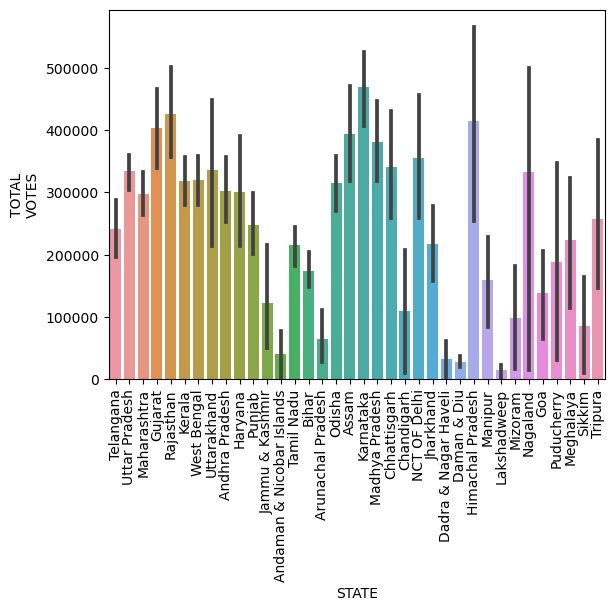

In [13]:
sns.barplot(x = z["STATE"], y = z["TOTAL\nVOTES"], data = z)
plt.xticks(rotation = 90)

In [14]:
z["CATEGORY"].value_counts()

GENERAL    1392
SC          383
ST          243
Name: CATEGORY, dtype: int64

In [15]:
z.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

<Axes: xlabel='CATEGORY', ylabel='TOTAL\nVOTES'>

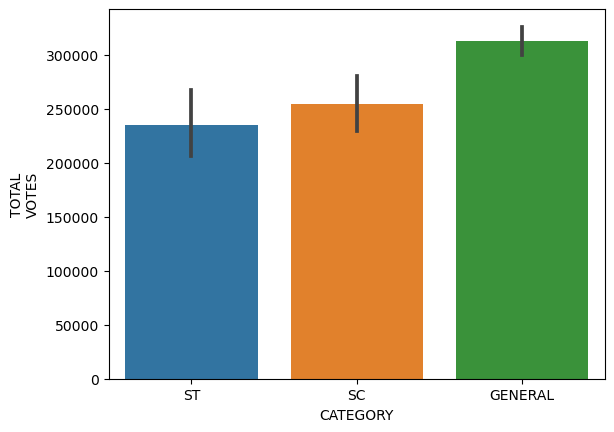

In [16]:
sns.barplot(x = z["CATEGORY"], y = z["TOTAL\nVOTES"], data = z)

<Axes: xlabel='GENERAL\nVOTES', ylabel='OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'>

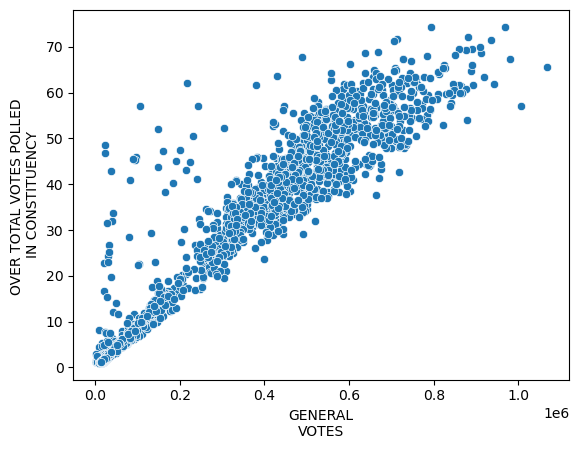

In [17]:
sns.scatterplot(x = z["GENERAL\nVOTES"], y= z["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"], data = z)

<Axes: xlabel='POSTAL\nVOTES', ylabel='OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'>

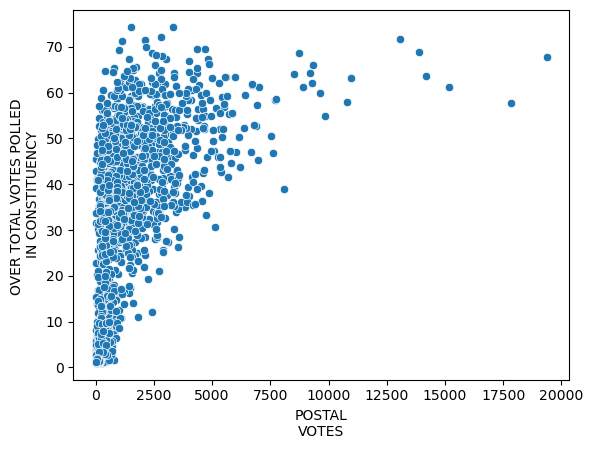

In [18]:
sns.scatterplot(x = z["POSTAL\nVOTES"], y= z["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"], data = z)

<Axes: xlabel='TOTAL ELECTORS', ylabel='OVER TOTAL ELECTORS \nIN CONSTITUENCY'>

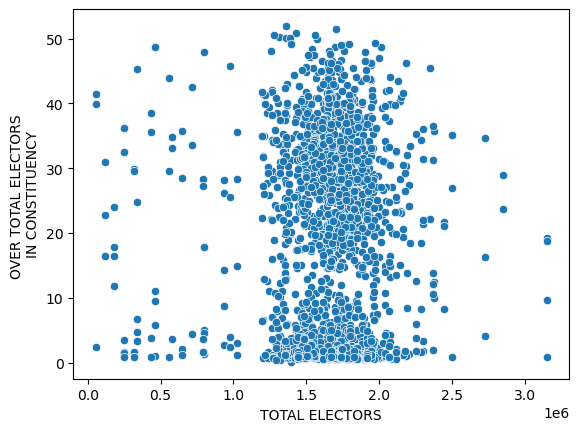

In [19]:
sns.scatterplot(x = z["TOTAL ELECTORS"], y= z["OVER TOTAL ELECTORS \nIN CONSTITUENCY"], data = z)

<Axes: xlabel='TOTAL\nVOTES', ylabel='OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'>

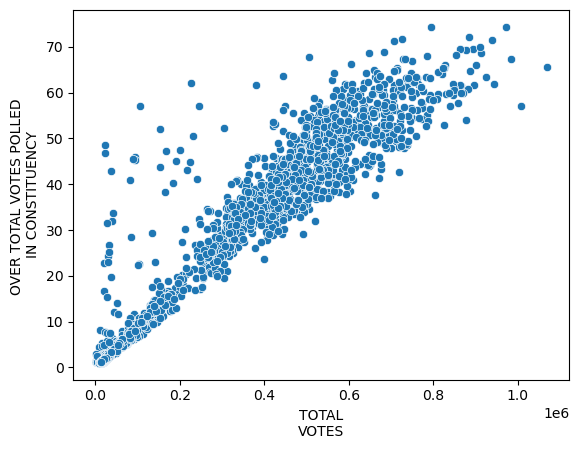

In [20]:
sns.scatterplot(x = z["TOTAL\nVOTES"], y= z["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"], data = z)

In [21]:
z.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

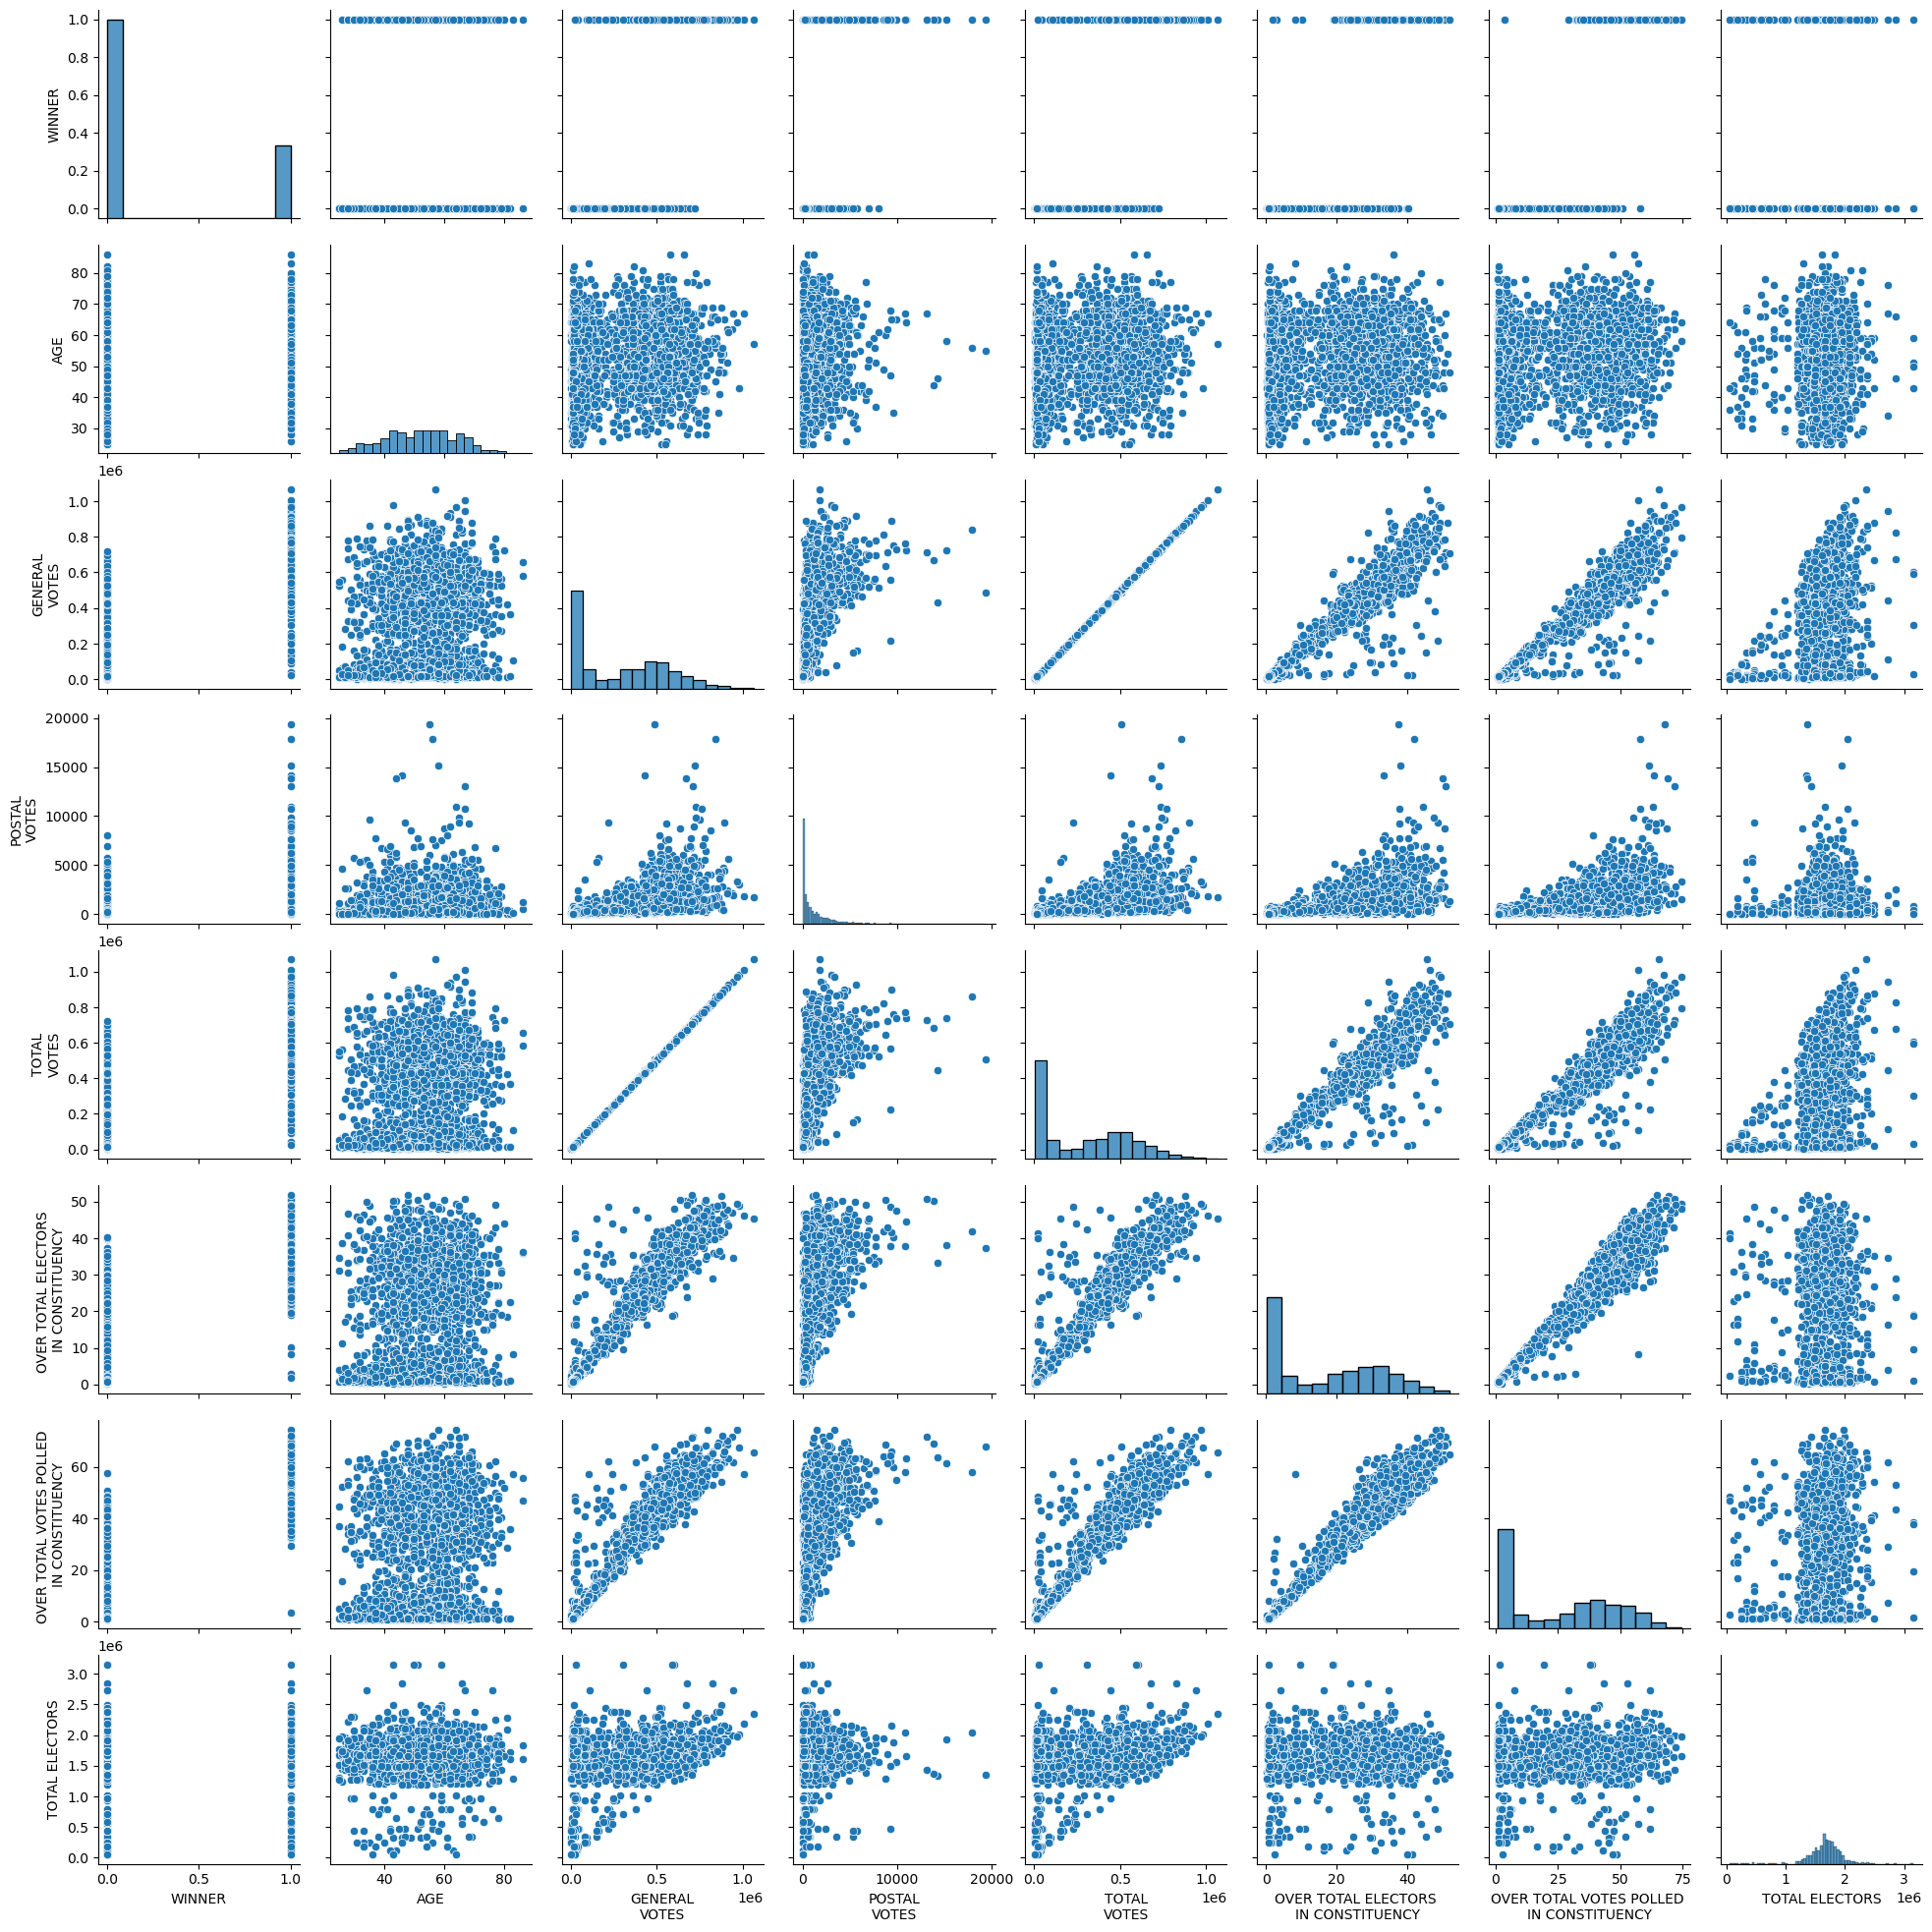

In [22]:
sns.pairplot(z)

Modelling

<Axes: >

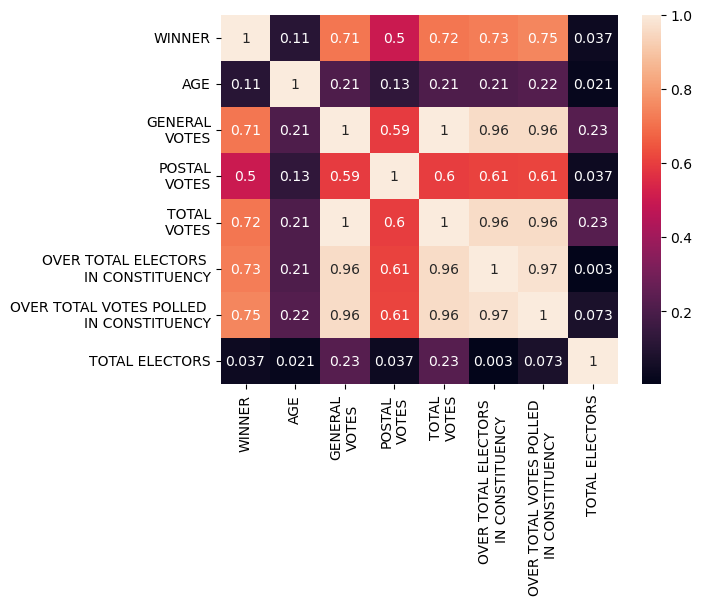

In [23]:
sns.heatmap(z.corr(), annot = True)

In [24]:
z.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

Regression Analysis

<Axes: xlabel='OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', ylabel='WINNER'>

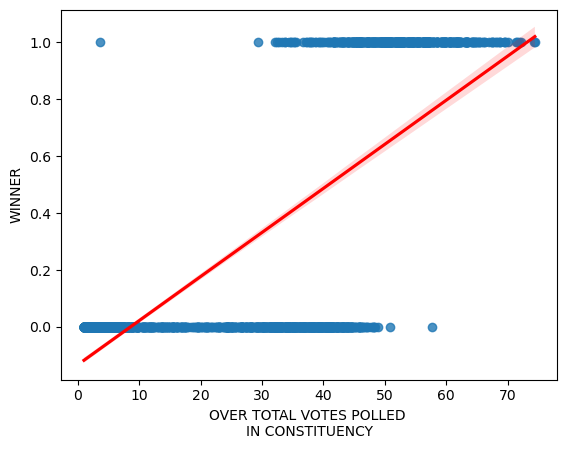

In [25]:
sns.regplot(x = z["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"], y = z["WINNER"], data = z, line_kws = {"color" : "red"})

In [26]:
x = z[["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY", "WINNER"]]

In [27]:
X = x
Y = x["WINNER"]

In [28]:
x_train, y_train, x_test, y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3)

In [29]:
x_train = x.drop(["WINNER"], axis = 1)
y_train = x.drop(["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"], axis = 1)

Fitting training dataset in Logistic Regression model

In [30]:
n = LogisticRegression()
n.fit(x_train, y_train)

LogisticRegression()

Evaluting training dataset

In [31]:
y_predict_train = n.predict(x_train)
r2_train =  r2_score(y_true = y_train, y_pred = y_predict_train)

In [32]:
round((r2_train), 2)*100

71.0

In [33]:
x_test = x.drop(["WINNER"], axis = 1)
y_test = x.drop(["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"], axis = 1)

Fitting testing dataset into Logistic Regression model

In [34]:
n = LogisticRegression()
n.fit(x_test, y_test)

LogisticRegression()

Evaluting testing dataset

In [35]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test,y_pred = y_predict_test)

In [36]:
round((r2_test), 2)*100

71.0

The winner candidate is

In [37]:
z["NAME"][z["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"] == max(z["OVER TOTAL VOTES POLLED \nIN CONSTITUENCY"])]

2033    Darshana Vikram Jardosh
Name: NAME, dtype: object